# Start

## Install

In [1]:
!pip install -qU bitsandbytes transformers accelerate langchain langgraph datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.3/157.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 10.5 MB/s eta 0:00:00


In [2]:
!pip install -qU langchain-experimental langchain-community langchain-core langchain-huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.6/209.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 1.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [3]:
!pip install -qU langgraph langchain-openai rich pydantic langchain-ollama groq langchain-groq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.3/84.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.6/463.6 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 9.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.50.0 requires pydantic<=2.12.3,>=2.0, but you have pydantic 2.12.5 which is incompatible.
bigframes 2.29.1 requires rich<14,>=12.4.4, but you have rich 14.2.0 which is incompatible.


In [ ]:
# dont need this
# !pip install -U --force-reinstall pillow==9.5.0

## Setup (if use HF model)

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig

# Make sure we have a GPU
if not torch.cuda.is_available():
    raise SystemError("GPU not found. Go to Runtime > Change runtime type > GPU")
print("GPU:", torch.cuda.get_device_name(0))

GPU: Tesla T4


In [ ]:
from google.colab import userdata
from huggingface_hub import login

login(userdata.get('HUGGINGFACE_HUB_TOKEN'))

In [ ]:
model_id = "bigcode/starcoderbase-3b"

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,           # enables 4-bit quantization
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",   # NormalFloat4
    bnb_4bit_compute_dtype=torch.bfloat16
)

tokenizer = AutoTokenizer.from_pretrained(model_id)

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    quantization_config=bnb_config,
    device_map="auto"
)

print("Model loaded in 4-bit successfully!")

pytorch_model.bin.index.json:   0%|          | 0.00/32.7k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/2.18G [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/34.4k [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

Model loaded in 4-bit successfully!


## Import

In [4]:
import os
import re
import json
import argparse
import subprocess
import tempfile
import itertools
from typing import Annotated, Dict, List, Literal
from PIL import Image
from io import BytesIO
from google.colab import userdata
from huggingface_hub import login

from pydantic import BaseModel, Field
from rich.console import Console
from rich.panel import Panel

from datasets import load_dataset
# import torch
# from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig

from langchain_core.messages import AnyMessage
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.tools import Tool
from langchain_core.runnables.graph import MermaidDrawMethod
from langchain_experimental.utilities import PythonREPL
from langchain_openai import ChatOpenAI
from langgraph.graph import END, START, StateGraph
from langgraph.graph.message import add_messages
from langchain_groq import ChatGroq
from langchain_ollama import ChatOllama

## Agent

### Prep agent

In [126]:
# Configuration
REPL_FUNCTION: Literal["langchain", "native"] = "native"
console = Console()

# Initialize Python REPL
python_repl = PythonREPL()
repl_tool = Tool(
    name="python_repl",
    description="A Python shell. Use this to execute python commands.",
    func=python_repl.run,
)

def get_graph_figure(
    app, save_path: str | None = None, background_color: str = "f0f2f6"
):
    image_data = app.get_graph().draw_mermaid_png(
        draw_method=MermaidDrawMethod.API, background_color=background_color
    )

    if save_path:
        with open(save_path, "wb") as f:
            f.write(image_data)

    bytes_io = BytesIO(image_data)
    image = Image.open(bytes_io)

    return image


def modify_test(problem):
  def add_try_except(assertions, curr_assert):
    assertions.append(f"{lead_space}try:")
    assertions.append(f"{lead_space*2}cnt_total += 1")
    assertions.append("\n".join([f"{lead_space}{line}" for line in curr_assert]))
    assertions.append(f"{lead_space*2}cnt_correct += 1")
    assertions.append(f"{lead_space}except Exception as e:")
    assertions.append(f"{lead_space*2}pass")
    return []

  lines = problem['test'].split("\n")
  lines = [line for line in lines if len(line.strip()) > 0 and (not line.strip().startswith('#'))]
  new_lines = []
  keyword = "assert"

  for j, line in enumerate(lines):
    new_lines.append(line)
    if "def check(candidate):" in lines[j]:
      lead_space = ''.join(itertools.takewhile(str.isspace, lines[j+1]))
      lead_indent = len(lead_space)
      new_lines.append(f"{lead_space}cnt_correct, cnt_total = 0, 0")
      break

  assertions = []
  curr_assert = []
  for i in range(j+1, len(lines)):
    line = lines[i]
    lead_indent = 0

    if keyword in line:
      if len(curr_assert) > 0:
        curr_assert = add_try_except(assertions, curr_assert)

    curr_assert.append(line)

  if len(curr_assert) > 0:
    curr_assert = add_try_except(assertions, curr_assert)

  new_lines.extend(assertions)
  new_lines.append(f"{lead_space}return cnt_correct, cnt_total")

  new_lines.append(f"\ndef get_result():\n{lead_space}return check({problem['entry_point']})")
  problem['new_test'] = "\n".join(new_lines)

def write_code_to_file(problem, result: dict):
    task_id = problem['task_id']

    # Create directory if it doesn't exist
    directory_path = os.path.dirname(task_id)
    os.makedirs(directory_path, exist_ok=True)
    file_path = task_id + '.py'

    modify_test(problem)

    test_cases = problem['new_test']
    code_to_write = [result["code_to_execute"], test_cases]

    with open(file_path, "w") as f:
        f.write('\n'.join(code_to_write))

    print(f"Code successfully written to {file_path}")


In [ ]:
# def modify_test(problem):
#   def add_try_except(assertions, curr_assert):
#     assertions.append(f"{lead_space}try:")
#     assertions.append(f"{lead_space*2}cnt_total += 1")
#     assertions.append("\n".join([f"{lead_space}{line}" for line in curr_assert]))
#     assertions.append(f"{lead_space*2}cnt_correct += 1")
#     assertions.append(f"{lead_space}except Exception as e:")
#     assertions.append(f"{lead_space*2}pass")
#     return []

#   lines = problem['test'].split("\n")
#   new_lines = []
#   keyword = "assert"

#   for j, line in enumerate(lines):

#     new_lines.append(line)
#     if "def check(candidate):" in lines[j]:
#       lead_indent = lines[j+1].index(keyword)
#       lead_space = ' '*lead_indent
#       new_lines.append(f"{lead_space}cnt_correct, cnt_total = 0, 0")
#       break

#   assertions = []
#   curr_assert = []
#   for i in range(j+1, len(lines)):
#     line = lines[i]
#     lead_indent = 0

#     if keyword in line:

#       if len(curr_assert) > 0:
#         curr_assert = add_try_except(assertions, curr_assert)

#     curr_assert.append(line)

#   if len(curr_assert) > 0:
#     curr_assert = add_try_except(assertions, curr_assert)

#   new_lines.extend(assertions)
#   new_lines.append(f"{lead_space}return cnt_correct, cnt_total")

#   new_lines.append(f"\ndef get_result():\n{lead_space}return check({problem['entry_point']})")
#   problem['new_test'] = "\n".join(new_lines)

# def write_code_to_file(problem, result: dict):
#     task_id = problem['task_id']

#     # Create directory if it doesn't exist
#     directory_path = os.path.dirname(task_id)
#     os.makedirs(directory_path, exist_ok=True)

#     file_path = task_id + '.py' # Append .py extension
#     try:
#       modify_test(problem)
#       test_cases = problem['new_test']
#     except:
#       test_cases = problem['test']
#     code_to_write = [result["code_to_execute"], test_cases]

#     with open(file_path, "w") as f:
#         f.write('\n'.join(code_to_write))

#     print(f"Code successfully written to {file_path}")


### Agent models

In [6]:
# State Models
class REPLState(BaseModel):
    """State for the REPL execution process."""

    action: Literal["continue", "complete"] = Field(default="continue")
    messages: Annotated[List[AnyMessage], add_messages] = Field(default_factory=list)
    code_history: List[str] = Field(default_factory=list)
    code_to_execute: str = Field(default="")
    last_execution_result: str | None = None
    error: str | None = None
    goal: str | None = None
    final_answer: str | None = None


class REPLDecision(BaseModel):
    """Decision on whether to continue execution or complete."""

    action: Literal["continue", "complete"]
    rationale: str


class CodeGeneration(BaseModel):
    """Generated code and explanation."""

    code: str
    explanation: str


class FinalSynthesis(BaseModel):
    """Final answer and explanation."""

    answer: str
    explanation: str



### Build agent

In [7]:
def create_repl_graph(verbose=False):
    """Creates and returns a compiled REPL execution graph."""
    # llm = ChatOpenAI(
    #     model="gpt-4o-mini",
    #     api_key=os.getenv("OPENAI_API_KEY"),
    #     base_url=os.getenv("OPENAI_BASE_URL"),
    # )
    llm = ChatGroq(
        model="meta-llama/llama-4-maverick-17b-128e-instruct",
        groq_api_key=userdata.get('GROQ_API_KEY'),
        temperature=0,
        max_tokens=None,
        # reasoning_format="parsed",
        # timeout=None,
        # max_retries=2,
        # other params...
    )
    # llm = ChatOllama(
    #     model="llama3.1",
    #     temperature=0,
    #     # other params...
    # )


    builder = StateGraph(REPLState)

    # Define nodes
    def decide_action(state: REPLState) -> Dict:
        """Decide whether to continue execution or complete."""
        if verbose:
            console.print(
                Panel(
                    f"[bold blue]Goal: {state.goal}\n"
                    f"Last Result: {state.last_execution_result or 'No execution yet'}\n"
                    f"Steps: {len(state.code_history)}",
                    title="Decision Phase",
                    border_style="blue",
                )
            )

        prompt = ChatPromptTemplate.from_messages(
            [
                (
                    "system",
                    """You are a Python coding assistant that decides whether the goal has been achieved.
Choose 'complete' only if the goal is achieved, execution was successful, and output shows expected results.
Choose 'continue' if the goal hasn't been achieved, there were errors, or more calculations are needed.""",
                ),
                (
                    "human",
                    "Goal: {goal}\n\nCurrent state:\nLast result: {last_result}\nHistory:\n{code_history}\n\nShould we continue or complete?",
                ),
            ]
        )

        chain = prompt | llm.with_structured_output(REPLDecision)
        result = chain.invoke(
            {
                "goal": state.goal,
                "last_result": state.last_execution_result or "No execution yet",
                "code_history": "\n".join(
                    f"Step {i + 1}:\n{code}"
                    for i, code in enumerate(state.code_history)
                )
                if state.code_history
                else "No code executed yet",
            }
        )

        if verbose:
            console.print(
                Panel(
                    f"[yellow]Decision:[/yellow] {result.action}\n"
                    f"[yellow]Rationale:[/yellow] {result.rationale}",
                    title="Decision Result",
                    border_style="blue",
                )
            )

        return {"action": result.action}

    def generate_code(state: REPLState) -> Dict:
        """Generate Python code to address the goal."""
        if verbose:
            console.print(
                Panel(
                    f"[bold yellow]Goal: {state.goal}\n"
                    f"Previous: {state.last_execution_result or 'No previous execution'}",
                    title="Code Generation",
                    border_style="yellow",
                )
            )

        prompt = ChatPromptTemplate.from_messages(
            [
                (
                    "system",
                    """Generate complete, self-contained Python code to achieve the goal.
Code must be complete, handle errors, and include clear print statements.""",
                ),
                ("human", "Goal: {goal}\n\nPrevious result: {last_result}"),
            ]
        )

        chain = prompt | llm.with_structured_output(CodeGeneration)
        result = chain.invoke(
            {
                "goal": state.goal,
                "last_result": state.last_execution_result or "No previous execution",
            }
        )

        if verbose:
            console.print(
                Panel(
                    f"[yellow]Explanation:[/yellow] {result.explanation}\n\n"
                    f"[yellow]Generated Code:[/yellow]\n{result.code}",
                    title="Generation Result",
                    border_style="yellow",
                )
            )

        return {"code_to_execute": result.code}

    def execute_code(state: REPLState) -> Dict:
        """Execute code in the REPL."""
        if verbose:
            console.print(
                Panel(
                    f"[yellow]Executing:[/yellow]\n{state.code_to_execute}",
                    title="Execution",
                    border_style="green",
                )
            )

        try:
            if REPL_FUNCTION == "langchain":
                result = repl_tool.run(state.code_to_execute)
            else:
                with tempfile.NamedTemporaryFile(
                    mode="w", suffix=".py", delete=False
                ) as tmp_file:
                    tmp_file.write(state.code_to_execute)
                    temp_file_name = tmp_file.name

                try:
                    process_result = subprocess.run(
                        ["python", temp_file_name],
                        capture_output=True,
                        text=True,
                        check=True,
                    )
                    result = process_result.stdout
                except subprocess.CalledProcessError as e:
                    result = e.stderr
                finally:
                    os.remove(temp_file_name)

            if verbose:
                console.print(
                    Panel(
                        f"[green]Output:[/green]\n{result}",
                        title="Execution Result",
                        border_style="green",
                    )
                )
            return {
                "last_execution_result": result,
                "code_history": state.code_history + [state.code_to_execute],
                "error": None,
            }
        except Exception as e:
            if verbose:
                console.print(
                    Panel(
                        f"[red]Error:[/red]\n{str(e)}",
                        title="Execution Failed",
                        border_style="red",
                    )
                )
            return {
                "last_execution_result": None,
                "code_history": state.code_history + [state.code_to_execute],
                "error": str(e),
            }

    def synthesize_answer(state: REPLState) -> Dict:
        """Generate final answer based on execution results."""
        execution_history = []
        for i, code in enumerate(state.code_history):
            execution_history.extend(
                [
                    f"Step {i + 1}:",
                    f"Code:\n{code}",
                    f"Result: {state.last_execution_result}"
                    if i == len(state.code_history) - 1
                    else "",
                    "",
                ]
            )

        prompt = ChatPromptTemplate.from_messages(
            [
                (
                    "system",
                    """Create a clear, concise answer focusing on WHAT was calculated/computed.
Start with the exact output that answers the query. Be specific and show the actual result.""",
                ),
                (
                    "human",
                    """Goal: {input_goal}
Execution History:
{execution_history}
Final Result: {final_result}""",
                ),
            ]
        )

        chain = prompt | llm.with_structured_output(FinalSynthesis)
        result = chain.invoke(
            {
                "input_goal": state.goal,
                "execution_history": "\n".join(execution_history),
                "final_result": state.last_execution_result,
            }
        )

        if verbose:
            console.print(
                Panel(
                    f"[yellow]Answer:[/yellow] {result.answer}\n\n"
                    f"[yellow]Explanation:[/yellow] {result.explanation}",
                    title="Final Result",
                    border_style="purple",
                )
            )

        return {"final_answer": result.answer}

    # Add nodes and edges
    builder.add_node("decide_action", decide_action)
    builder.add_node("generate_code", generate_code)
    builder.add_node("execute_code", execute_code)
    builder.add_node("synthesize_answer", synthesize_answer)

    builder.add_edge(START, "decide_action")
    builder.add_conditional_edges(
        "decide_action",
        lambda state, config: state.action,
        {"continue": "generate_code", "complete": "synthesize_answer"},
    )
    builder.add_edge("generate_code", "execute_code")
    builder.add_edge("execute_code", "decide_action")
    builder.add_edge("synthesize_answer", END)

    return builder.compile()



## Testing

### Support func

In [212]:
def prep_prompt(code: str, prompt: str, example: str, indent=2):
  res = ["\n\n"]
  lines = code.strip().split("\n")
  indent_space = ' '*indent
  example = example.replace("assert", "").strip()
  for line in lines:
    if line.startswith("def"):
      res.append(line)
      res.append(f'{indent_space}"""')
      res.append(f'{indent_space}{prompt}')
      res.append(f'{indent_space}>>> {example}')
      res.append(f'{indent_space}"""')
      return '\n'.join(res)
  return f"{prompt}\n{code}"

def prep_test(test_list: list, indent=2):
  res = ["\n\ndef check(candidate):"]
  indent_space = ' '*indent
  for test in test_list:
    if "check(" in test: continue # prevent recursive call (e.g ID=56)
    res.append(f'{indent_space}{test}')
  return '\n'.join(res)

def prep_entry_point(code: str):
  lines = code.strip().split("\n")
  for line in lines:
    if line.startswith("def"):
      res = line.replace("def", "").strip()
      res = res[:res.index("(")]
      return res
  return ""

def reformat_mbpp_to_humaneval(row, name="mbpp"):
  row['task_id'] =  f"{name}/{row['task_id']}"
  row['prompt'] = prep_prompt(code=row['code'], prompt=row['prompt'], example=row['test_list'][0])
  row['test'] = prep_test(test_list=row['test_list'])
  row['entry_point'] = prep_entry_point(code=row['code'])
  row['canonical_solution'] = row['code']
  del row['code'], row['test_list']
  return row

def view_dataset(dataset, idx=0):
  for k in dataset[idx].keys():
    print(k)
    print(dataset[idx][k])
    print('-'*50)

### Load agent

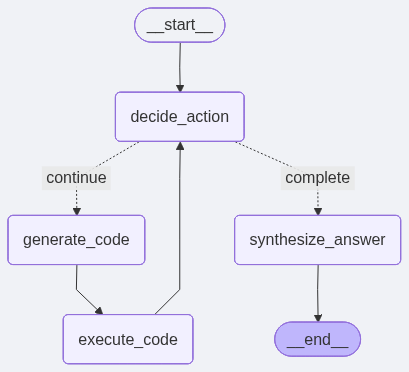

In [78]:
graph = create_repl_graph(verbose=False)
get_graph_figure(graph, "workflow_graph.png")

### Load dataset

In [213]:
# Load the entire dataset
humaneval_dataset = load_dataset("openai/openai_humaneval")
humaneval_dataset_test = humaneval_dataset["test"]

# mbpp_dataset = load_dataset("google-research-datasets/mbpp")
# mbpp_dataset_test = mbpp_dataset["test"]

mbpp_dataset_sanitized = load_dataset("google-research-datasets/mbpp", "sanitized")
mbpp_dataset_sanitized_test = mbpp_dataset_sanitized["test"]

mbpp_dataset_sanitized_test_clean = mbpp_dataset_sanitized_test.map(reformat_mbpp_to_humaneval, fn_kwargs={"name": "mbpp"})

len(humaneval_dataset_test), len(mbpp_dataset_sanitized_test_clean)

Map:   0%|          | 0/257 [00:00<?, ? examples/s]

(164, 257)

In [64]:
view_dataset(mbpp_dataset_sanitized_test_clean, idx=0)
view_dataset(humaneval_dataset_test, idx=123)

source_file
Benchmark Questions Verification V2.ipynb
--------------------------------------------------
task_id
mbpp/11
--------------------------------------------------
prompt



def remove_Occ(s,ch): 
  """
  Write a python function to remove first and last occurrence of a given character from the string.
  >>> remove_Occ("hello","l") == "heo"
  """
--------------------------------------------------
test_imports
[]
--------------------------------------------------
test


def check(candidate):
  assert remove_Occ("hello","l") == "heo"
  assert remove_Occ("abcda","a") == "bcd"
  assert remove_Occ("PHP","P") == "H"
--------------------------------------------------
entry_point
remove_Occ
--------------------------------------------------
canonical_solution
def remove_Occ(s,ch): 
    for i in range(len(s)): 
        if (s[i] == ch): 
            s = s[0 : i] + s[i + 1:] 
            break
    for i in range(len(s) - 1,-1,-1):  
        if (s[i] == ch): 
            s = s[0 : i] + s[i 

### Sample test

In [65]:
# Problem: "has_close_elements" - Check if any two elements in a list are closer than a threshold.
problem_index = 31
problem = humaneval_dataset_test[problem_index]
problem = mbpp_dataset_sanitized_test_clean[problem_index]

print(problem.keys())
print(problem["prompt"])
print(problem["test"])

dict_keys(['source_file', 'task_id', 'prompt', 'test_imports', 'test', 'entry_point', 'canonical_solution'])



def sequence(n): 
  """
  Write a function to find the nth number in the newman conway sequence.
  >>> sequence(10) == 6
  """


def check(candidate):
  assert sequence(10) == 6
  assert sequence(2) == 1
  assert sequence(3) == 2


In [66]:
goal = f"""
Here is the problem:
{problem["prompt"]}
"""

result = graph.invoke(REPLState(goal=goal))
write_code_to_file(problem, result)
print(result.keys())

╭──────────────────────────────────────────────── Decision Phase ─────────────────────────────────────────────────╮
│ Goal:                                                                                                           │
│ Here is the problem:                                                                                            │
│                                                                                                                 │
│                                                                                                                 │
│                                                                                                                 │
│ def sequence(n):                                                                                                │
│   """                                                                                                           │
│   Write a function to find the nth number in the newman conway sequence.                                        │
│   >>> sequence(10) == 6                                                                                         │
│   """                                                                                                           │
│                                                                                                                 │
│ Last Result: No execution yet                                                                                   │
│ Steps: 0                                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Decision Result ────────────────────────────────────────────────╮
│ Decision: continue                                                                                              │
│ Rationale: The goal is to implement the function to find the nth number in the Newman Conway sequence. No code  │
│ has been executed yet, so we need to continue.                                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Code Generation ────────────────────────────────────────────────╮
│ Goal:                                                                                                           │
│ Here is the problem:                                                                                            │
│                                                                                                                 │
│                                                                                                                 │
│                                                                                                                 │
│ def sequence(n):                                                                                                │
│   """                                                                                                           │
│   Write a function to find the nth number in the newman conway sequence.                                        │
│   >>> sequence(10) == 6                                                                                         │
│   """                                                                                                           │
│                                                                                                                 │
│ Previous: No previous execution                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Generation Result ───────────────────────────────────────────────╮
│ Explanation: This function generates the Newman-Conway sequence up to the nth number. It starts with a list     │
│ containing the first three numbers in the sequence (0, 1, 1). Then, it enters a loop that continues until it    │
│ has generated n+1 numbers. In each iteration, it appends the sum of the numbers at the indices specified by the │
│ previous two numbers in the sequence. Finally, it returns the nth number in the sequence.                       │
│                                                                                                                 │
│ Generated Code:                                                                                                 │
│ def sequence(n):                                                                                                │
│     seq = [0, 1, 1]                                                                                             │
│     for i in range(3, n+1):                                                                                     │
│         seq.append(seq[seq] + seq[i-seq])                                                                       │
│     return seq                                                                                                  │
│                                                                                                                 │
│ print(sequence(10))                                                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────── Execution ───────────────────────────────────────────────────╮
│ Executing:                                                                                                      │
│ def sequence(n):                                                                                                │
│     seq = [0, 1, 1]                                                                                             │
│     for i in range(3, n+1):                                                                                     │
│         seq.append(seq[seq] + seq[i-seq])                                                                       │
│     return seq                                                                                                  │
│                                                                                                                 │
│ print(sequence(10))                                                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Execution Result ────────────────────────────────────────────────╮
│ Output:                                                                                                         │
│ 6                                                                                                               │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Decision Phase ─────────────────────────────────────────────────╮
│ Goal:                                                                                                           │
│ Here is the problem:                                                                                            │
│                                                                                                                 │
│                                                                                                                 │
│                                                                                                                 │
│ def sequence(n):                                                                                                │
│   """                                                                                                           │
│   Write a function to find the nth number in the newman conway sequence.                                        │
│   >>> sequence(10) == 6                                                                                         │
│   """                                                                                                           │
│                                                                                                                 │
│ Last Result: 6                                                                                                  │
│                                                                                                                 │
│ Steps: 1                                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Decision Result ────────────────────────────────────────────────╮
│ Decision: complete                                                                                              │
│ Rationale: The function 'sequence(n)' is implemented correctly and the output for 'sequence(10)' is 6, which    │
│ matches the expected result. Therefore, the goal is achieved.                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────── Final Result ──────────────────────────────────────────────────╮
│ Answer: 6                                                                                                       │
│                                                                                                                 │
│ Explanation: The 10th number in the Newman Conway sequence is 6.                                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Code successfully written to mbpp/84.py
dict_keys(['action', 'messages', 'code_history', 'code_to_execute', 'last_execution_result', 'error', 'goal', 'final_answer'])


In [67]:
print(problem.keys())
problem['entry_point']

dict_keys(['source_file', 'task_id', 'prompt', 'test_imports', 'test', 'entry_point', 'canonical_solution', 'new_test'])


'sequence'

### Infer

In [218]:
def run_inference(dataset):
  test_len = len(dataset)
  for i in range(test_len):
    problem = dataset[i]
    try:
      result = graph.invoke(REPLState(goal=problem["prompt"]))
      write_code_to_file(problem, result)
    except Exception as e:
      print(f"Error in {i}-th problem --> skip: {e}")
    # if i==5: break

In [224]:
run_inference(dataset=humaneval_dataset_test)
run_inference(dataset=mbpp_dataset_sanitized_test_clean)

Code successfully written to HumanEval/0.py
Code successfully written to HumanEval/1.py
Code successfully written to HumanEval/2.py
Code successfully written to HumanEval/3.py
Code successfully written to HumanEval/4.py
Code successfully written to HumanEval/5.py
Code successfully written to mbpp/11.py
Code successfully written to mbpp/12.py
Code successfully written to mbpp/14.py
Code successfully written to mbpp/16.py
Code successfully written to mbpp/17.py
Code successfully written to mbpp/18.py


### Eval

In [227]:
def run_evaluate(dataset_name):
  import importlib

  cnt_correct, cnt_total = 0, 0
  problem_cnt = 0
  for filename in os.listdir(f"{os.getcwd()}/{dataset_name}"):
    filepath = os.path.join(f"{os.getcwd()}/{dataset_name}", filename)

    if filepath.endswith('.py'):
      try:
        # Set an alarm for 2 seconds
        # signal.alarm(2)

        module_name = os.path.basename(filepath).replace('.py', '')
        print(f"ID: {module_name}", end=" ")

        # Create a module spec from the file path
        spec = importlib.util.spec_from_file_location(module_name, filepath)
        foo = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(foo)

        get_result_func_from_module = getattr(foo, 'get_result')
        problem_correct, problem_total = get_result_func_from_module()

        cnt_correct += problem_correct
        cnt_total += problem_total
        problem_cnt += 1
        print(f"Correct: {problem_correct}/{problem_total}(testcases)")

      except Exception as e:
        print(f"Error in {filename}: {e}")

  print(f"Eval: {dataset_name}, Correct: {cnt_correct}/{cnt_total}(testcases) out of {problem_cnt}(problems)\n")


In [228]:
run_evaluate(dataset_name="HumanEval")
run_evaluate(dataset_name="mbpp")

ID: 0 Correct: 7/7(testcases)
ID: 1 ['()', '(())', '(()())']
Correct: 4/4(testcases)
ID: 4 1.0
Correct: 3/3(testcases)
ID: 3 False
True
Correct: 6/6(testcases)
ID: 2 0.5
Correct: 3/3(testcases)
ID: 5 []
[1, 4, 2, 4, 3]
Correct: 3/3(testcases)
Eval: HumanEval, Correct: 26/26(testcases) out of 6(problems)

ID: 16 True
False
False
False
Correct: 3/3(testcases)
ID: 17 40
Correct: 3/3(testcases)
ID: 12 Correct: 3/3(testcases)
ID: 11 heo
Correct: 3/3(testcases)
ID: 14 240.0
Correct: 3/3(testcases)
ID: 18 bacuve
Correct: 3/3(testcases)
Eval: mbpp, Correct: 18/18(testcases) out of 6(problems)



# END